In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
poke = pd.read_csv('/content/Pokemon.csv', sep=',' , encoding = 'latin1')
display(poke)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


In [ ]:
poke_num = poke.select_dtypes(include=['int', 'float'])
poke_final = pd.concat([poke['name'], poke_num], axis=1)
display(poke_final)

,name,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
0,Bulbasaur,1,318,45,49,49,65,65,45,1
1,Ivysaur,2,405,60,62,63,80,80,60,1
2,Venusaur,3,525,80,82,83,100,100,80,1
3,Mega Venusaur,3,625,80,100,123,122,120,80,1
4,Gigantamax Venusaur,3,525,80,82,83,100,100,80,1
...,...,...,...,...,...,...,...,...,...,...
1067,Glastrier,896,580,100,145,130,65,110,30,8
1068,Spectrier,897,580,100,65,60,145,80,130,8
1069,Calyrex,898,500,100,80,80,80,80,80,8
1070,Ice Rider Calyrex,898,680,100,165,150,85,130,50,8


In [20]:
# Definire la classe Pokemon
class Pokemon:
    def __init__(self, name, poke_df):
        self.name = name
        self.poke_df = poke_df
        self.stats = self.get_stats()

    def get_stats(self):
        # Estrae le statistiche del Pokémon dal dataframe
        stats = self.poke_df[self.poke_df['name'] == self.name]
        if stats.empty:
            raise ValueError(f"Pokémon {self.name} non trovato nel dataset.")
        return stats.iloc[0]

    def media_aritmetica(self):
        # Calcola la media aritmetica delle statistiche
        stats = self.stats[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].values
        return np.mean(stats)

    def media_geometrica(self):
        # Calcola la media geometrica delle statistiche
        stats = self.stats[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].values
        n = stats.size
        m = np.prod(stats)
        return pow(m, 1 / n)

    def compare(self, other):
        # Confronta le statistiche con un altro Pokémon
        if not isinstance(other, Pokemon):
            raise ValueError("Il confronto deve essere fatto con un altro oggetto di tipo Pokemon.")

        comparison = {}
        for stat in ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']:
            comparison[stat] = {
                self.name: self.stats[stat],
                other.name: other.stats[stat],
                'difference': self.stats[stat] - other.stats[stat]
            }

        return comparison




In [ ]:
# Funzione per il grafico di confronto
def plot_comparison(poke1, poke2):
    comparison = poke1.compare(poke2)
    comparison_df = pd.DataFrame(comparison).T
    display(comparison_df)

    # Grafico di confronto
    comparison_df[[poke1.name, poke2.name]].plot(kind='bar')
    plt.title(f'Confronto delle statistiche tra {poke1.name} e {poke2.name}')
    plt.ylabel('Valore')
    plt.xticks(rotation=45)
    plt.show()

In [23]:
# Funzione per il grafico di confronto con medie
def plot_comparison_with_means(poke1, poke2):
    stats_poke1 = poke1.stats[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].values
    stats_poke2 = poke2.stats[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].values

    # Calcolare la media aritmetica e geometrica
    geom_mean_poke1 = poke1.media_geometrica()
    geom_mean_poke2 = poke2.media_geometrica()

    # Creare il grafico
    plt.figure(figsize=(10, 6))

    # Plot delle statistiche
    plt.scatter(range(len(stats_poke1)), stats_poke1, alpha=0.7, label=f'{poke1.name} Statistiche', color='blue')
    plt.scatter(range(len(stats_poke2)), stats_poke2, alpha=0.7, label=f'{poke2.name} Statistiche', color='orange')

    # Aggiungere le linee delle medie geometriche
    plt.plot(range(len(stats_poke1)), np.full(len(stats_poke1), geom_mean_poke1), color="blue", linestyle='--', label=f'Media geometrica statistiche {poke1.name}: {geom_mean_poke1:.2f}')
    plt.plot(range(len(stats_poke2)), np.full(len(stats_poke2), geom_mean_poke2), color="orange", linestyle='--', label=f'Media geometrica statistiche {poke2.name}: {geom_mean_poke2:.2f}')

    plt.title(f'Confronto delle statistiche e delle medie geometriche tra {poke1.name} e {poke2.name}')
    plt.ylabel('Valore')
    plt.xlabel('Statistiche')
    plt.xticks(range(len(stats_poke1)), ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

,Bulbasaur,Ivysaur,difference
total,318,405,-87
hp,45,60,-15
attack,49,62,-13
defense,49,63,-14
sp_attack,65,80,-15
sp_defense,65,80,-15
speed,45,60,-15


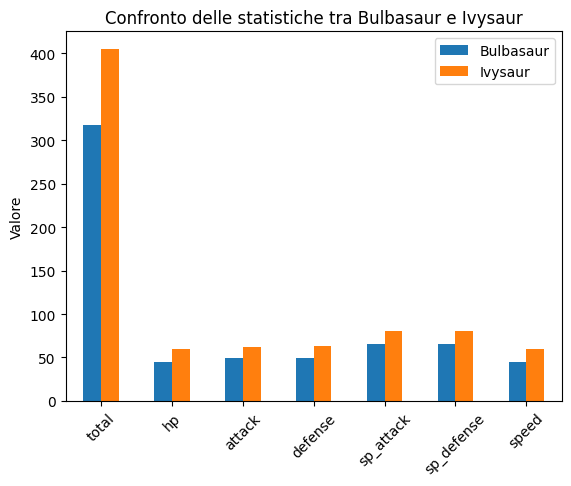

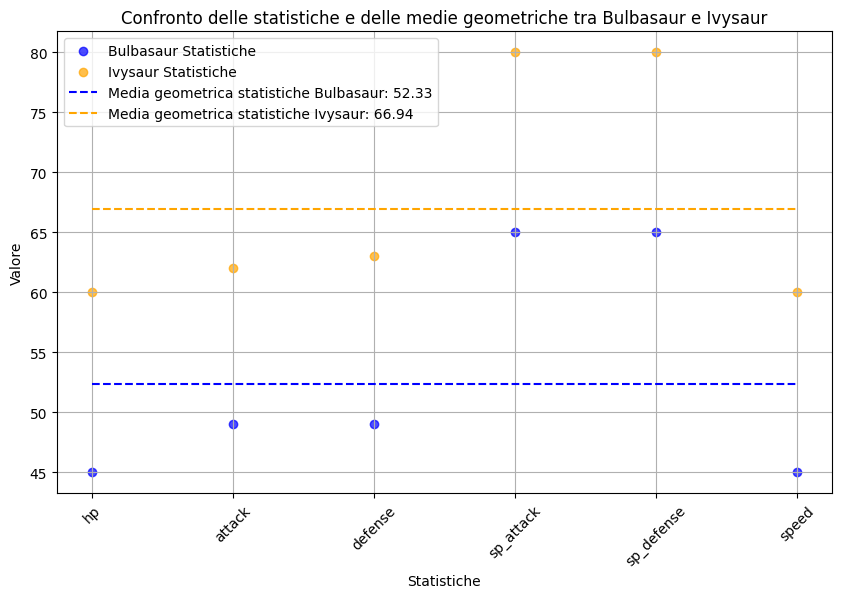

In [24]:
# Esempio di utilizzo della classe
poke1 = Pokemon('Bulbasaur', poke)
poke2 = Pokemon('Ivysaur', poke)

# Confrontare le statistiche dei due Pokémon
comparison = poke1.compare(poke2)

# Visualizzare il confronto

plot_comparison(poke1, poke2)

plot_comparison_with_means(poke1, poke2)

Gestire i pokemon attraverso la programmazione ad oggetti.

Voce elenco

Voce elenco

Visualizzare le caratteristiche dei pokemon e confrontarli attraverso le medie